#### Probmap visualization

In [12]:
import numpy as np
import matplotlib.pyplot as plt

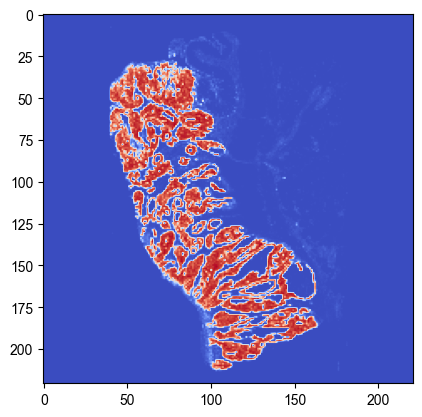

In [13]:
class_idx = {
    'ADI': 0, 'BACK': 1, 'DEB': 2, 'LYM': 3, 'MUC': 4, 
    'MUS': 5, 'NORM': 6, 'STR': 7, 'TUM': 8
}
prob_path = '/mnt/bulk-saturn/junhao/pathfinder/PathPrism/0_PrismNet/WSI_probmap/TCGA-EI-6514-01Z-00-DX1.d31b7dc9-3024-419e-a60d-53385e59369f.npy'
probmap = np.load(prob_path)
plt.imshow(probmap[:,:,class_idx['TUM']],cmap='coolwarm')

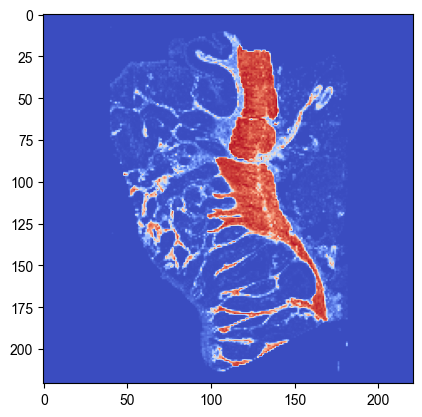

In [14]:
plt.imshow(probmap[:,:,class_idx['MUS']],cmap='coolwarm')

#### Segmap visualization

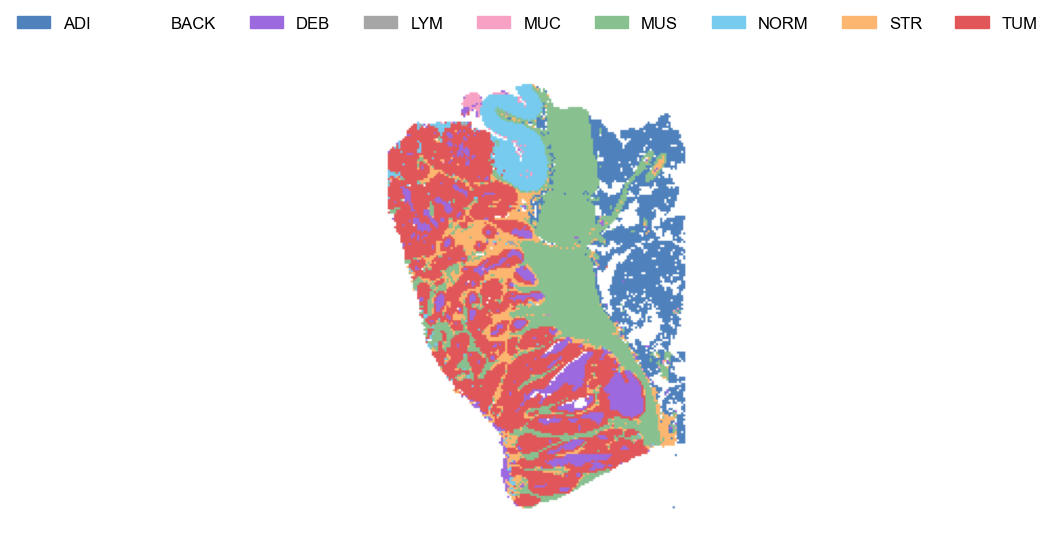

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
from matplotlib import font_manager as fm
import matplotlib.colors as mcolors

# 设置字体为 Arial
arial_path = "/usr/share/fonts/truetype/msttcorefonts/Arial.ttf"
fm.fontManager.addfont(arial_path)
plt.rcParams['font.family'] = 'Arial'


prob_matrix = probmap
H, W, C = prob_matrix.shape

# 类别映射
class_idx = {'ADI': 0, 'BACK': 1, 'DEB': 2, 'LYM': 3, 'MUC': 4, 
                'MUS': 5, 'NORM': 6, 'STR': 7, 'TUM': 8}
idx_to_class = {v: k for k, v in class_idx.items()}

# 使用 argmax 生成分割图
multi_classes = np.argmax(prob_matrix, axis=-1)

# 如果原始点为全零，则归为 BACK
zero_mask = np.sum(prob_matrix, axis=-1) == 0
multi_classes[zero_mask] = class_idx['BACK']

# 颜色映射（可加透明 BACK）
color_map = {
    0: "#4F81BD",  # ADI
    1: "#FFFFFF",  # BACK
    2: "#9C6ADE",  # DEB
    3: "#A6A6A6",  # LYM
    4: "#F7A1C4",  # MUC
    5: "#88C090",  # MUS
    6: "#76CBEF",  # NORM
    7: "#FDB66F",  # STR
    8: "#E15759",  # TUM
}

exclude_back = False
if exclude_back:
    color_map[1] = (0, 0, 0, 0)  # BACK透明

# 创建颜色图像
if exclude_back:
    color_img = np.ones((H, W, 4), dtype=np.float32)
    for label, color in color_map.items():
        mask = (multi_classes == label)
        if isinstance(color, str):
            rgb = np.array(mcolors.hex2color(color))
            color_img[mask, :3] = rgb
            color_img[mask, 3] = 1  # 不透明
        else:
            color_img[mask] = color  # 包含透明 BACK
else:
    color_img = np.zeros((H, W, 3), dtype=np.float32)
    for label, color in color_map.items():
        mask = (multi_classes == label)
        rgb = np.array(mcolors.hex2color(color))
        color_img[mask] = rgb

# 绘图
fig, ax = plt.subplots(figsize=(6, 6))
if exclude_back:
    ax.set_facecolor('#f0f0f0')  # 背景灰色显示透明区域
ax.imshow(color_img)
ax.axis('off')

# 添加图例
channels_to_process = [i for i in range(C) if not (exclude_back and i == class_idx['BACK'])]
patches = [
    mpatches.Patch(color=color_map[i], label=idx_to_class[i])
    for i in channels_to_process
]
fig.legend(
    handles=patches,
    loc='upper center',
    ncol=len(patches),
    fontsize=12,
    frameon=False,
    bbox_to_anchor=(0.5, 0.98)
)

plt.show()
